### Importing Libraries

In [139]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

plt.style.use('fivethirtyeight')

pd.options.display.max_colwidth = 100

### Creating Functions

Creating several needed functions for the study : 
- get_stock_rates in order import stock exchange rates for a given company
- plotting functions to create linear plot of the stock price evolution 
- stock prediction functions

In [140]:
def MinMaxScaling_df_stock_tweets(df):
    """
    Feeding a dataframe with MinMax Scaled data to be ploted
    
    Input : raw dataframe of 
    Output : dataframe with 3 new columns : 
                - Adj_scaled i.e MinMax Scaled Adjusted Close Stock Price
                - Tweet_interactions_scaled i.e MinMax Scaled Twitter interactions = Sum of Retweets & Replies
    """
    
#     df.set_index('date', inplace=True)
    scaler = preprocessing.MinMaxScaler()
    df_temp = scaler.fit_transform(df)
    df_to_scale = pd.DataFrame(df_temp, columns=[['Adj Close', 'tweet_amount','tweet_interactions']])
#     print(df_to_scale)
#     df['Adj_scaled'] = df_to_scale['Adj Close']

#     df['tweet_amount_scaled'] = df_to_scale['tweet_amount']

#     df['tweet_interactions_scaled'] = df_to_scale['tweet_interactions']
#     print(df)
#     df.set_index('date', inplace=True)
    
    return df_to_scale

In [141]:
class Tweet(object):
    """ Display Tweets issued from the embedded link on the platform"""
    
    def __init__(self, embed_str=None):
        self.embed_str = embed_str

    def _repr_html_(self):
        return self.embed_str

In [142]:
def create_Twitter_link(url):
    """Link of the tweet display
    Input : raw url of the tweet
    Output : url usable with the Tweet class object"""
    
    source_twitter="<blockquote class='twitter-tweet'><a href="+ url +"></a></blockquote> <script async src='https://platform.twitter.com/widgets.js' charset='utf-8'></script>1" 
    
    return source_twitter

## Importing Tesla daily stock exchange values from 2010 IPO onwards

In [143]:
df_TSLA = pd.read_csv('../DataSets/Stocks_raw_data/TSLA_stocks_rate_2010-01-01_to_2020-03-08.csv', index_col='Date')

In [144]:
df_TSLA['PCT_change'] = df_TSLA['Adj Close'].pct_change(fill_method='ffill')

In [145]:
df_TSLA

,High,Low,Open,Close,Volume,Adj Close,avg_price,PCT_change
Date,,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300.0,23.889999,21.270000,NaN
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100.0,23.830000,26.860000,-0.002511
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800.0,21.959999,23.095000,-0.078473
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800.0,19.200001,20.905000,-0.125683
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900.0,16.110001,17.915000,-0.160938
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700.0,15.800000,15.804999,-0.019243
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400.0,17.459999,16.545000,0.105063
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600.0,17.400000,17.224999,-0.003436
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500.0,17.049999,17.535000,-0.020115


Adding PCT_change i.e. percetange change evolution from one day to another to measure the general trend of each day

In [146]:
df_TSLA

,High,Low,Open,Close,Volume,Adj Close,avg_price,PCT_change
Date,,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300.0,23.889999,21.270000,NaN
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100.0,23.830000,26.860000,-0.002511
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800.0,21.959999,23.095000,-0.078473
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800.0,19.200001,20.905000,-0.125683
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900.0,16.110001,17.915000,-0.160938
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700.0,15.800000,15.804999,-0.019243
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400.0,17.459999,16.545000,0.105063
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600.0,17.400000,17.224999,-0.003436
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500.0,17.049999,17.535000,-0.020115


In [147]:
df_TSLA.dtypes

High          float64
Low           float64
Open          float64
Close         float64
Volume        float64
Adj Close     float64
avg_price     float64
PCT_change    float64
dtype: object

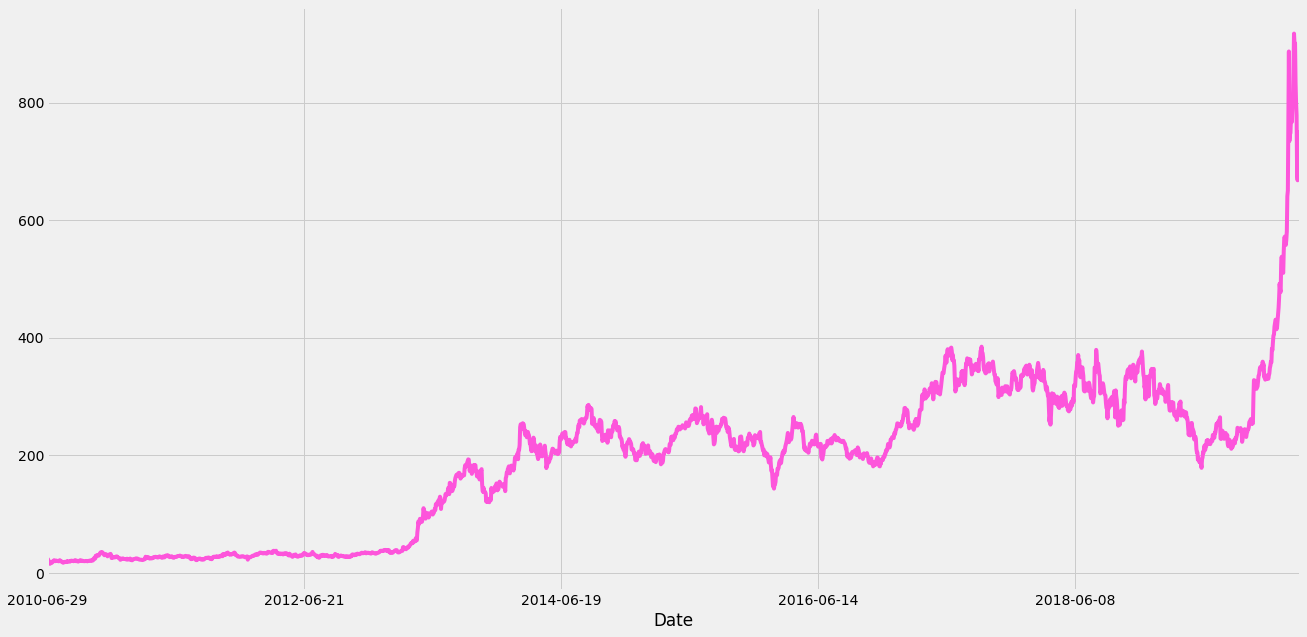

In [148]:
df_TSLA['Adj Close'].plot(figsize=(20,10), c=np.random.rand(3))

## 3 - Comparison of Stock Price VS. Twitter activity

### XXX-1. Importing Musk Tweets

In [149]:
# musk_tweets = pd.read_csv('../DataSets/df_musk_tweets.csv', index_col='Unnamed: 0')

In [150]:
df_musk_general_tweets_groupby = pd.read_csv('../DataSets/Twitter_data/df_musk_general_tweets_groupby.csv')

In [151]:
# Testing without Favorites

In [152]:
df_musk_general_tweets_groupby.drop(columns='favorites', inplace=True)

df_musk_general_tweets_groupby['tweet_interactions'] = df_musk_general_tweets_groupby['retweets'] + df_musk_general_tweets_groupby['replies']

In [153]:
df_musk_general_tweets_groupby['date'] = pd.to_datetime(df_musk_general_tweets_groupby['date'])

Merging Adjusted close price dataframe with the amount of Tweets from Elon Musk

In [154]:
# Converting Date column to datetime
# musk_tweets_groupby['date'] = pd.to_datetime(musk_tweets_groupby['date'])

In [155]:
df_TSLA_reduce = df_TSLA.reset_index()

df_TSLA_reduce = df_TSLA_reduce [['Date', 'Adj Close']]

#renaming column Date to date for future merge 
df_TSLA_reduce.columns = ('date', 'Adj Close')

df_TSLA_reduce['date'] = pd.to_datetime(df_TSLA_reduce['date'])

### XXX-2. Comparing to all 8797 Musk Tweets

Analyzing all 8797 independently of the content to see whether Musk's Twitter activity has an overall impact on the stock evolution

Creating a new dataframe (df_general_tweets), merging all 8797 with the evolution of stocks (left join on the daily stock activity)

##### Data Wrangling
Filling NaN (days without tweets) with 0

In [156]:
df_general_tweets = pd.merge(df_TSLA_reduce, df_musk_general_tweets_groupby, how='left', on='date')

df_general_tweets.fillna(value=0, inplace=True)

df_general_tweets

,date,Adj Close,text,retweets,replies,tweet_interactions
0,2010-06-29,23.889999,0.0,0.0,0.0,0.0
1,2010-06-30,23.830000,0.0,0.0,0.0,0.0
2,2010-07-01,21.959999,0.0,0.0,0.0,0.0
3,2010-07-02,19.200001,0.0,0.0,0.0,0.0
4,2010-07-06,16.110001,0.0,0.0,0.0,0.0
5,2010-07-07,15.800000,0.0,0.0,0.0,0.0
6,2010-07-08,17.459999,0.0,0.0,0.0,0.0
7,2010-07-09,17.400000,0.0,0.0,0.0,0.0
8,2010-07-12,17.049999,0.0,0.0,0.0,0.0
9,2010-07-13,18.139999,0.0,0.0,0.0,0.0


In [157]:
df_general_tweets.drop(columns = ['retweets', 'replies'], inplace=True)

In [158]:
df_general_tweets

,date,Adj Close,text,tweet_interactions
0,2010-06-29,23.889999,0.0,0.0
1,2010-06-30,23.830000,0.0,0.0
2,2010-07-01,21.959999,0.0,0.0
3,2010-07-02,19.200001,0.0,0.0
4,2010-07-06,16.110001,0.0,0.0
5,2010-07-07,15.800000,0.0,0.0
6,2010-07-08,17.459999,0.0,0.0
7,2010-07-09,17.400000,0.0,0.0
8,2010-07-12,17.049999,0.0,0.0
9,2010-07-13,18.139999,0.0,0.0


In [159]:
df_general_tweets.set_index('date', inplace=True)

In [160]:
df_general_tweets_to_scale = df_general_tweets.copy()

In [161]:
df_general_tweets_to_scale

,Adj Close,text,tweet_interactions
date,,,
2010-06-29,23.889999,0.0,0.0
2010-06-30,23.830000,0.0,0.0
2010-07-01,21.959999,0.0,0.0
2010-07-02,19.200001,0.0,0.0
2010-07-06,16.110001,0.0,0.0
2010-07-07,15.800000,0.0,0.0
2010-07-08,17.459999,0.0,0.0
2010-07-09,17.400000,0.0,0.0
2010-07-12,17.049999,0.0,0.0


In order to compare such different measures (Stock value in hundreds of dollars) and amount of tweets (in units of tweets)

Using the Scaler (MinMaxScaling_df_stock_tweets function) and feeding the Tweet dataframe with the scaled value to have both original & scaled value

In [162]:
df_general_tweets_to_scale = MinMaxScaling_df_stock_tweets(df_general_tweets_to_scale)

In [163]:
df_general_tweets_to_scale

,Adj Close,tweet_amount,tweet_interactions
0,0.008973,0.000000,0.000000
1,0.008906,0.000000,0.000000
2,0.006832,0.000000,0.000000
3,0.003771,0.000000,0.000000
4,0.000344,0.000000,0.000000
5,0.000000,0.000000,0.000000
6,0.001841,0.000000,0.000000
7,0.001775,0.000000,0.000000
8,0.001386,0.000000,0.000000
9,0.002595,0.000000,0.000000


In [164]:
df_general_tweets['Adj_scaled'] = df_general_tweets_to_scale['Adj Close']

df_general_tweets['tweet_amount_scaled'] = df_general_tweets_to_scale['tweet_amount']

df_general_tweets['tweet_interactions_scaled'] = df_general_tweets_to_scale['tweet_interactions']

In [165]:
df_general_tweets

,Adj Close,text,tweet_interactions,Adj_scaled,tweet_amount_scaled,tweet_interactions_scaled
date,,,,,,
2010-06-29,23.889999,0.0,0.0,NaN,NaN,NaN
2010-06-30,23.830000,0.0,0.0,NaN,NaN,NaN
2010-07-01,21.959999,0.0,0.0,NaN,NaN,NaN
2010-07-02,19.200001,0.0,0.0,NaN,NaN,NaN
2010-07-06,16.110001,0.0,0.0,NaN,NaN,NaN
2010-07-07,15.800000,0.0,0.0,NaN,NaN,NaN
2010-07-08,17.459999,0.0,0.0,NaN,NaN,NaN
2010-07-09,17.400000,0.0,0.0,NaN,NaN,NaN
2010-07-12,17.049999,0.0,0.0,NaN,NaN,NaN


In [166]:
# df_general_tweets.set_index('date', inplace=True)

Plotting general tweet impact on the stock

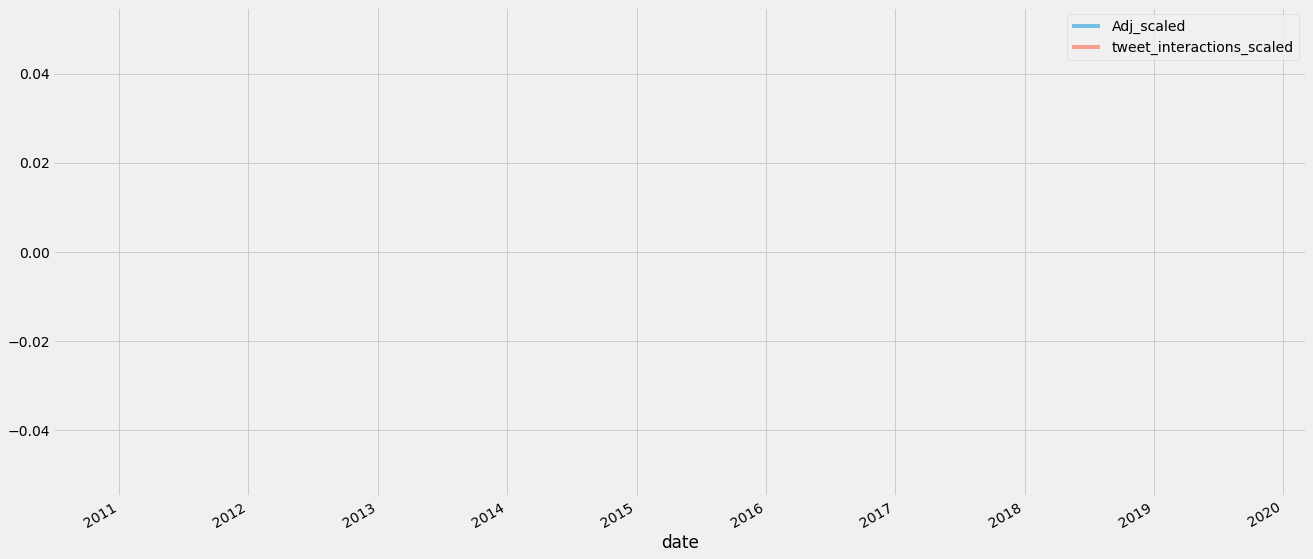

In [167]:
df_general_tweets[['Adj_scaled', 'tweet_interactions_scaled']].plot(alpha=0.5, figsize=(20,10))

Correlation matrix

In [168]:
corr_general_tweets = df_general_tweets.corr()

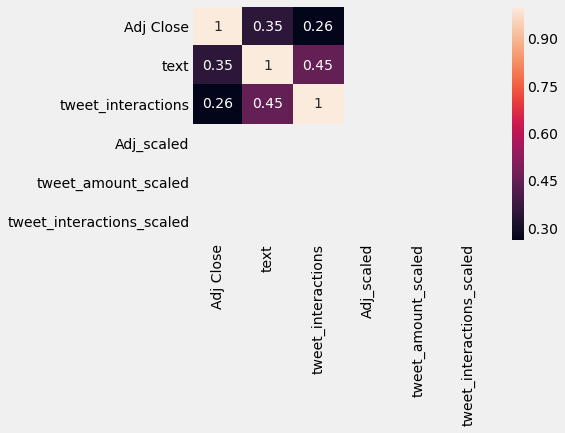

In [169]:
sns.heatmap(corr_general_tweets, annot=True)

## Merging Tesla related tweets with Tesla stock evolution

In [170]:
df_musk_Tesla_tweets_groupby = pd.read_csv('../DataSets/Twitter_data/df_musk_Tesla_tweets_groupby.csv')

In [171]:
df_musk_Tesla_tweets_groupby.drop(columns='favorites', inplace=True)

df_musk_Tesla_tweets_groupby['tweet_interactions'] = df_musk_Tesla_tweets_groupby['retweets'] + df_musk_Tesla_tweets_groupby['replies']

In [172]:
df_musk_Tesla_tweets_groupby['date'] = pd.to_datetime(df_musk_Tesla_tweets_groupby['date'])

In [173]:
# df_TSLA_related_tweets = df_TSLA_related_tweets[['Date', 'Adj Close']]

# df_TSLA_related_tweets.columns = ('date', 'Adj Close')

# df_TSLA_related_tweets['date'] = pd.to_datetime(df_TSLA_related_tweets['date'])

In [174]:
# df_TSLA_related_tweets

In [175]:
df_TSLA_related_tweets = pd.merge(df_TSLA_reduce, df_musk_Tesla_tweets_groupby, how='left', on='date')

df_TSLA_related_tweets.fillna(value=0, inplace=True)

df_TSLA_related_tweets

,date,Adj Close,text,retweets,replies,tweet_interactions
0,2010-06-29,23.889999,0.0,0.0,0.0,0.0
1,2010-06-30,23.830000,0.0,0.0,0.0,0.0
2,2010-07-01,21.959999,0.0,0.0,0.0,0.0
3,2010-07-02,19.200001,0.0,0.0,0.0,0.0
4,2010-07-06,16.110001,0.0,0.0,0.0,0.0
5,2010-07-07,15.800000,0.0,0.0,0.0,0.0
6,2010-07-08,17.459999,0.0,0.0,0.0,0.0
7,2010-07-09,17.400000,0.0,0.0,0.0,0.0
8,2010-07-12,17.049999,0.0,0.0,0.0,0.0
9,2010-07-13,18.139999,0.0,0.0,0.0,0.0


In [176]:
df_TSLA_related_tweets.drop(columns = ['retweets', 'replies'], inplace=True)

In [177]:
df_TSLA_tweets_to_scale = df_TSLA_related_tweets.copy()

In [178]:
df_TSLA_tweets_to_scale

,date,Adj Close,text,tweet_interactions
0,2010-06-29,23.889999,0.0,0.0
1,2010-06-30,23.830000,0.0,0.0
2,2010-07-01,21.959999,0.0,0.0
3,2010-07-02,19.200001,0.0,0.0
4,2010-07-06,16.110001,0.0,0.0
5,2010-07-07,15.800000,0.0,0.0
6,2010-07-08,17.459999,0.0,0.0
7,2010-07-09,17.400000,0.0,0.0
8,2010-07-12,17.049999,0.0,0.0
9,2010-07-13,18.139999,0.0,0.0


Creating a Scaler and feeding the Tweet dataframe with the scaled value to have both original & scaled value

In [179]:
df_TSLA_tweets_to_scale.set_index('date', inplace=True)

In order to compare such different measures (Stock value in hundreds of dollars) and amount of tweets (in units of tweets)

In [180]:
df_scaled_TSLA_related_tweets = MinMaxScaling_df_stock_tweets(df_TSLA_tweets_to_scale)

In [181]:
df_scaled_TSLA_related_tweets

,Adj Close,tweet_amount,tweet_interactions
0,0.008973,0.000000,0.000000
1,0.008906,0.000000,0.000000
2,0.006832,0.000000,0.000000
3,0.003771,0.000000,0.000000
4,0.000344,0.000000,0.000000
5,0.000000,0.000000,0.000000
6,0.001841,0.000000,0.000000
7,0.001775,0.000000,0.000000
8,0.001386,0.000000,0.000000
9,0.002595,0.000000,0.000000


In [182]:
df_TSLA_related_tweets['Adj_scaled'] = df_scaled_TSLA_related_tweets['Adj Close']

df_TSLA_related_tweets['tweet_amount_scaled'] = df_scaled_TSLA_related_tweets['tweet_amount']

df_TSLA_related_tweets['tweet_interactions_scaled'] = df_scaled_TSLA_related_tweets['tweet_interactions']

In [183]:
df_TSLA_related_tweets

,date,Adj Close,text,tweet_interactions,Adj_scaled,tweet_amount_scaled,tweet_interactions_scaled
0,2010-06-29,23.889999,0.0,0.0,0.008973,0.000000,0.000000
1,2010-06-30,23.830000,0.0,0.0,0.008906,0.000000,0.000000
2,2010-07-01,21.959999,0.0,0.0,0.006832,0.000000,0.000000
3,2010-07-02,19.200001,0.0,0.0,0.003771,0.000000,0.000000
4,2010-07-06,16.110001,0.0,0.0,0.000344,0.000000,0.000000
5,2010-07-07,15.800000,0.0,0.0,0.000000,0.000000,0.000000
6,2010-07-08,17.459999,0.0,0.0,0.001841,0.000000,0.000000
7,2010-07-09,17.400000,0.0,0.0,0.001775,0.000000,0.000000
8,2010-07-12,17.049999,0.0,0.0,0.001386,0.000000,0.000000
9,2010-07-13,18.139999,0.0,0.0,0.002595,0.000000,0.000000


In [184]:
df_TSLA_related_tweets.set_index('date', inplace=True)

#### Plotting Tesla related tweets impact on the stock

Here we can see how Tesla related Tweets may have a bigger impact due to 

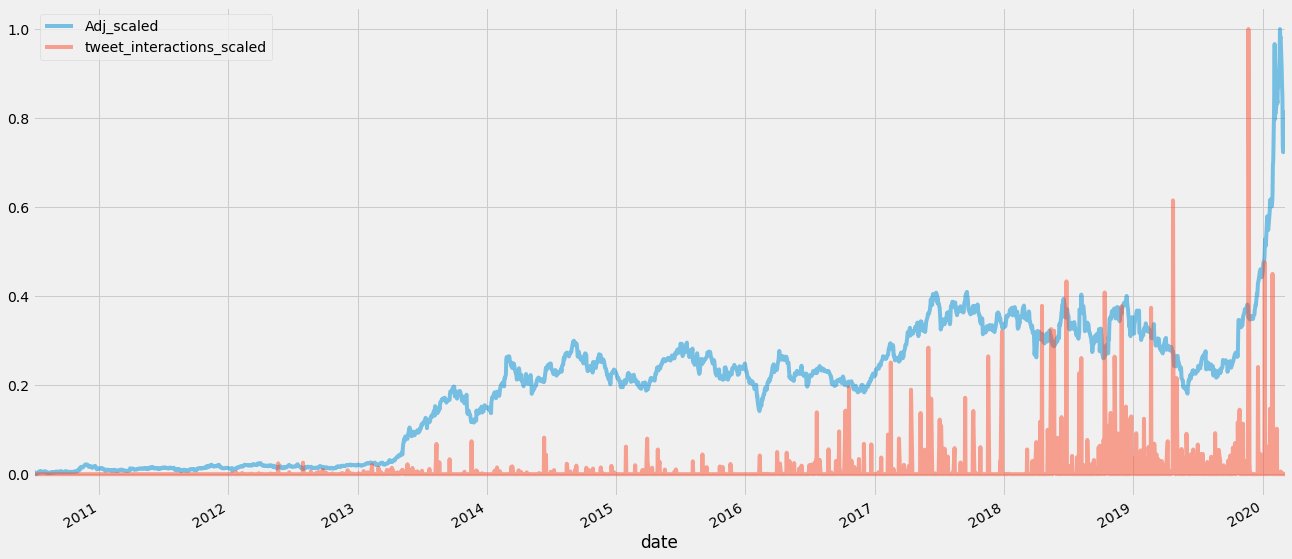

In [185]:
df_TSLA_related_tweets[['Adj_scaled', 'tweet_interactions_scaled']].plot(alpha=0.5, figsize=(20,10))

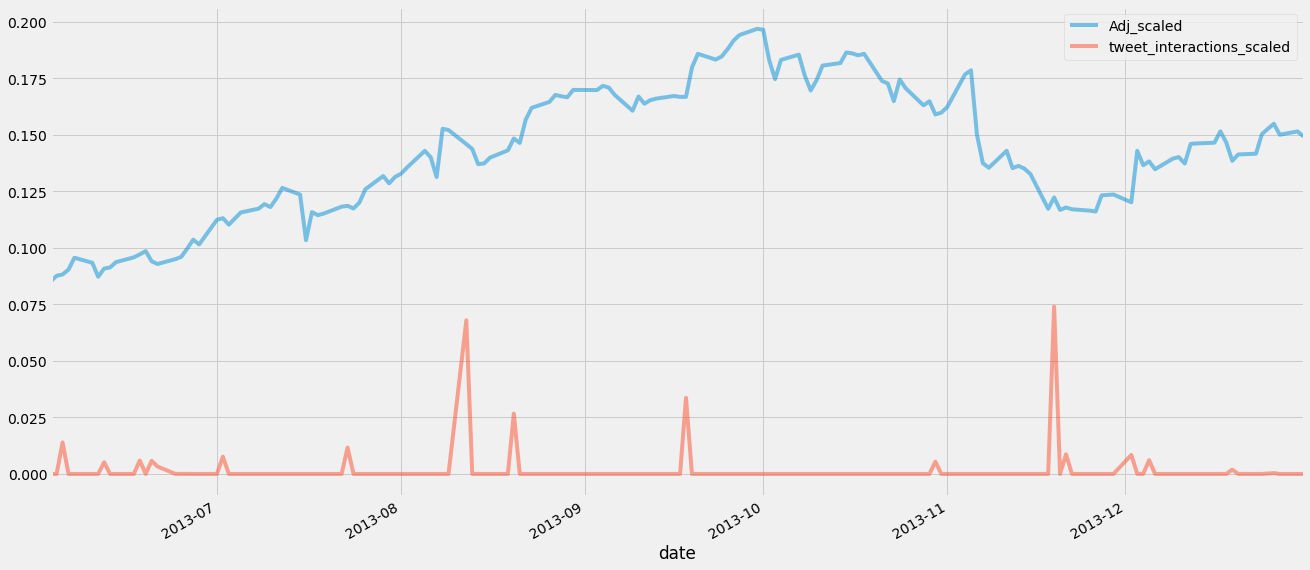

In [186]:
#new Focusing on period with LOC
df_TSLA_related_tweets[['Adj_scaled', 'tweet_interactions_scaled']]['2013-06-01':'2014-01-01'].plot(alpha=0.5, figsize=(20,10))

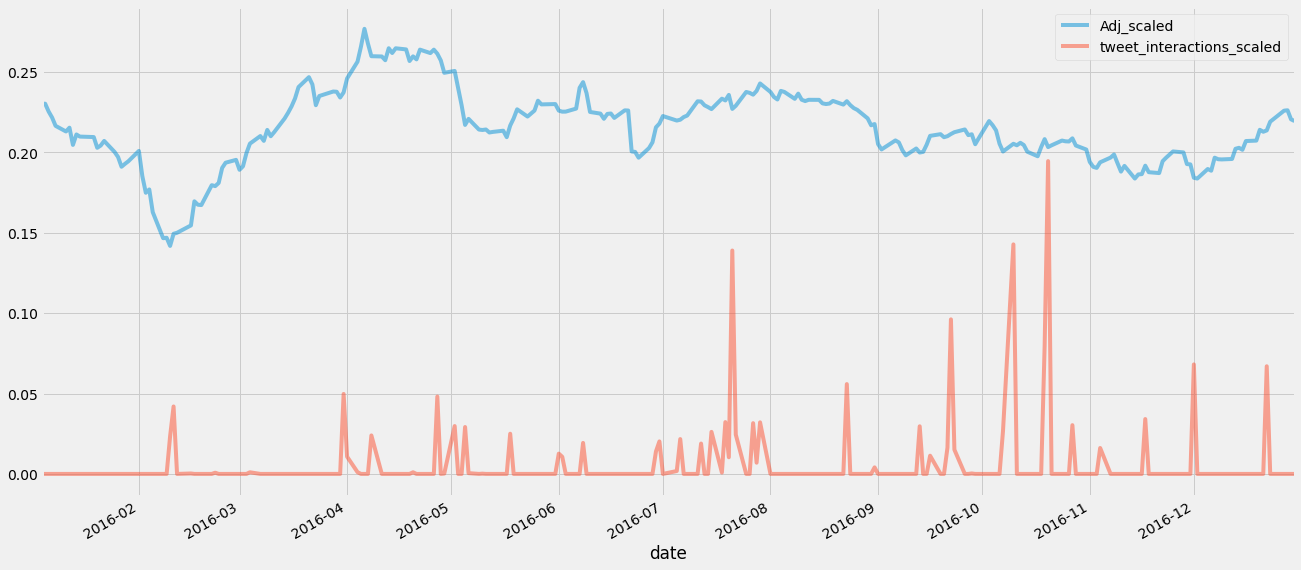

In [187]:
#new Focusing on period with LOC
df_TSLA_related_tweets[['Adj_scaled', 'tweet_interactions_scaled']]['2016-01-01':'2017-01-01'].plot(alpha=0.5, figsize=(20,10))

### XXXX - 1 Checking on Most interacted tweets

In [188]:
# pd.options.display.max_rows = 999
pd.options.display.max_rows = 30

Focusing on several specific tweets

Generating a list ot top 100 tweets in terms of interactions in order to then measure which publications may have generated the most reactions.

When looking at the top 100 tweets in terms of interactions, all of them were published in 2014 onwards.

### Several hypothesis
- Tesla started to get visibility among the general public starting 2012 when the Model S was launched - Elon Musk became an important Twitter figure slightly after

- Elon Musk's number of followers increased continously year after year, hence his tweets would have much more Twitter echo during the last year when he has a tremendous follower base (currently 32M). 
The follower number is not scrapable, therefore it is impossible to measure the evolution of that metrics.

- Day with important events (product launch, special event, technical incidents...) may generate tweets to communicate, promote and/or reassure the audience following that particular event

- Day with important twitter activity generate mechanically more interactions 


##### sorted by date
2014 is the oldest year present in the top 100 interaction

In [189]:
Top_100_TSLA_tweets = df_musk_Tesla_tweets_groupby.nlargest(n=100, columns='tweet_interactions')

Top_100_TSLA_tweets = Top_100_TSLA_tweets.sort_values(by='date')

Top_100_TSLA_tweets

,date,text,retweets,replies,tweet_interactions
128,2014-06-12,1,6521,1163,7684
155,2015-03-30,1,6440,1035,7475
206,2016-04-09,1,6367,1334,7701
225,2016-07-10,5,17429,1725,19154
232,2016-07-21,2,11776,1236,13012
244,2016-09-22,2,8276,726,9002
249,2016-10-10,3,12277,1092,13369
251,2016-10-19,3,6407,1023,7430
252,2016-10-20,3,16664,1556,18220
254,2016-10-29,2,8401,1615,10016


###### sorted decreasingly by interactions

In [190]:
Top_100_TSLA_tweets = df_musk_Tesla_tweets_groupby.nlargest(n=100, columns='tweet_interactions')

Top_100_TSLA_tweets

,date,text,retweets,replies,tweet_interactions
604,2019-11-24,7,133786,24310,158096
602,2019-11-22,5,66799,26839,93638
603,2019-11-23,3,65069,17091,82160
507,2019-04-23,12,41783,15812,57595
331,2018-04-01,4,46144,7594,53738
619,2020-01-07,1,37175,7420,44595
629,2020-01-29,1,37648,4488,42136
372,2018-06-26,6,9765,30801,40566
415,2018-10-12,2,32960,5263,38223
337,2018-04-18,1,33313,2095,35408


In [191]:
Top_300_TSLA_tweets = df_musk_Tesla_tweets_groupby.nlargest(n=300, columns='tweet_interactions')

Top_300_TSLA_tweets = Top_300_TSLA_tweets.sort_values(by='date')

Top_300_TSLA_tweets

,date,text,retweets,replies,tweet_interactions
14,2012-05-22,2,1800,482,2282
19,2012-07-31,1,2005,423,2428
46,2013-02-11,6,1663,338,2001
82,2013-05-22,1,1841,251,2092
96,2013-08-12,1,5653,709,6362
97,2013-08-20,1,2118,382,2500
98,2013-09-18,2,2758,394,3152
102,2013-11-19,3,5371,1560,6931
108,2013-12-21,1,1636,215,1851
119,2014-03-11,1,1308,226,1534


# Focus on the 2018-2020 period where important Stock events 

In [192]:
df_TSLA_related_tweets

,Adj Close,text,tweet_interactions,Adj_scaled,tweet_amount_scaled,tweet_interactions_scaled
date,,,,,,
2010-06-29,23.889999,0.0,0.0,0.008973,0.000000,0.000000
2010-06-30,23.830000,0.0,0.0,0.008906,0.000000,0.000000
2010-07-01,21.959999,0.0,0.0,0.006832,0.000000,0.000000
2010-07-02,19.200001,0.0,0.0,0.003771,0.000000,0.000000
2010-07-06,16.110001,0.0,0.0,0.000344,0.000000,0.000000
2010-07-07,15.800000,0.0,0.0,0.000000,0.000000,0.000000
2010-07-08,17.459999,0.0,0.0,0.001841,0.000000,0.000000
2010-07-09,17.400000,0.0,0.0,0.001775,0.000000,0.000000
2010-07-12,17.049999,0.0,0.0,0.001386,0.000000,0.000000


In [193]:
df_TSLA_related_tweets

,Adj Close,text,tweet_interactions,Adj_scaled,tweet_amount_scaled,tweet_interactions_scaled
date,,,,,,
2010-06-29,23.889999,0.0,0.0,0.008973,0.000000,0.000000
2010-06-30,23.830000,0.0,0.0,0.008906,0.000000,0.000000
2010-07-01,21.959999,0.0,0.0,0.006832,0.000000,0.000000
2010-07-02,19.200001,0.0,0.0,0.003771,0.000000,0.000000
2010-07-06,16.110001,0.0,0.0,0.000344,0.000000,0.000000
2010-07-07,15.800000,0.0,0.0,0.000000,0.000000,0.000000
2010-07-08,17.459999,0.0,0.0,0.001841,0.000000,0.000000
2010-07-09,17.400000,0.0,0.0,0.001775,0.000000,0.000000
2010-07-12,17.049999,0.0,0.0,0.001386,0.000000,0.000000


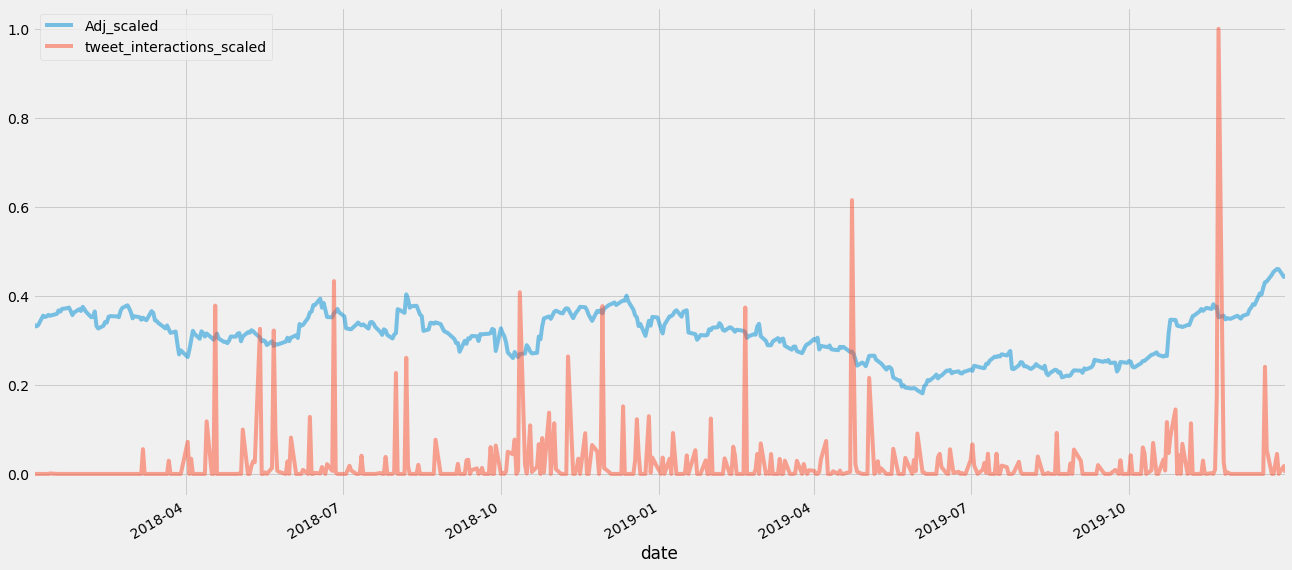

In [194]:
#new Focusing on period with LOC
df_TSLA_related_tweets[['Adj_scaled', 'tweet_interactions_scaled']]['2018-01-01':'2020-01-01'].plot(alpha=0.5, figsize=(20,10))

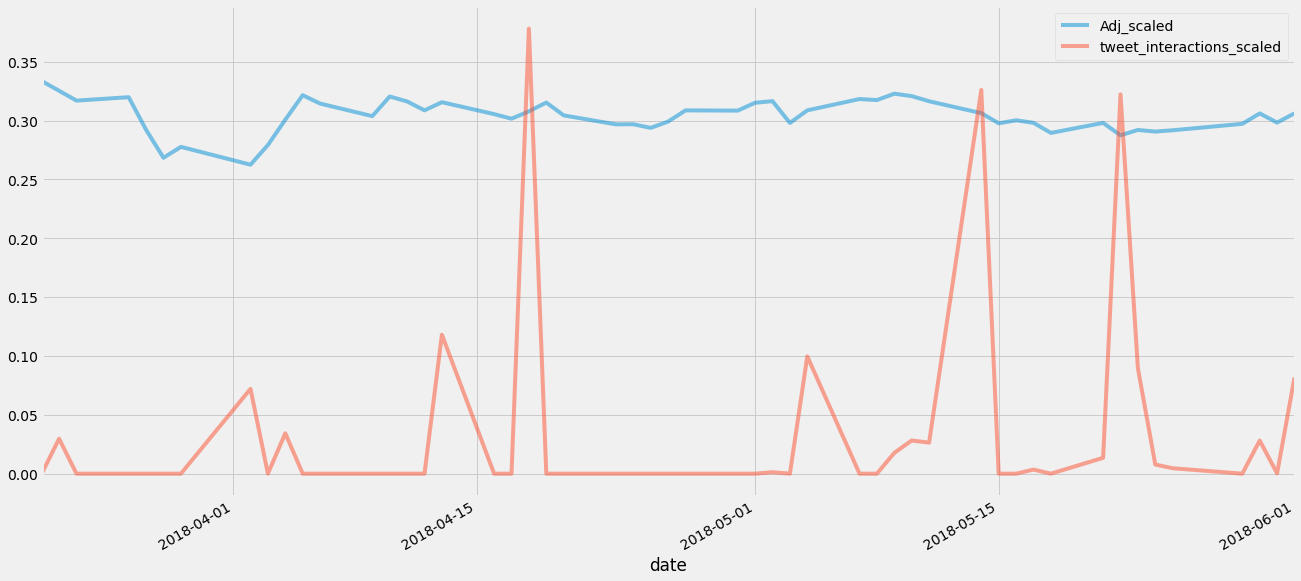

In [195]:
#Focus on April 2018 during April fool Joke - Model 3 & 
df_TSLA_related_tweets[['Adj_scaled', 'tweet_interactions_scaled']]['2018-03-21':'2018-06-01'].plot(alpha=0.5, figsize=(20,10))

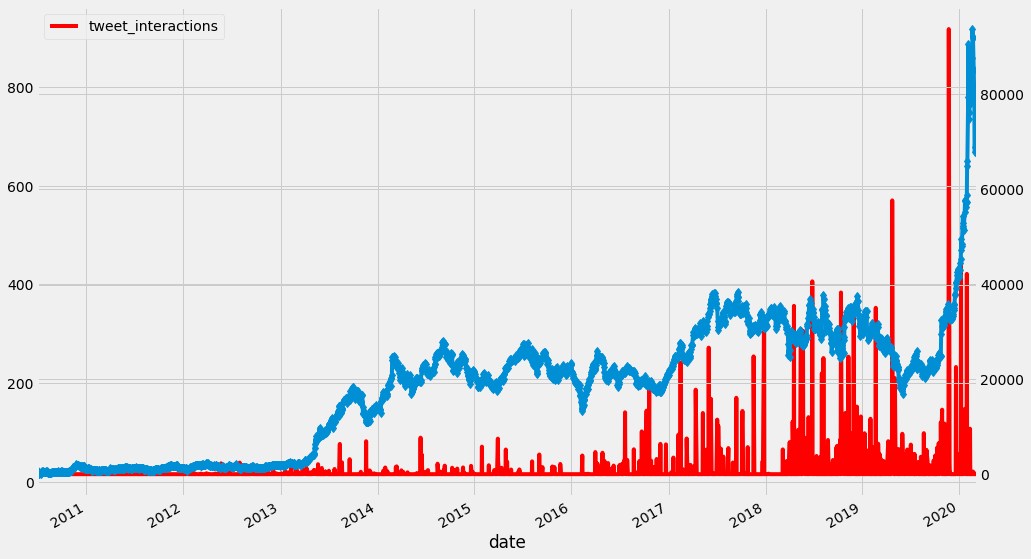

In [196]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_xlabel('date')
ax2 = ax1.twinx()
df_TSLA_related_tweets[['tweet_interactions']].plot(kind='line', color='r',ax=ax1)
df_TSLA_related_tweets['Adj Close'].plot(kind='line', marker='d', ax=ax2)
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

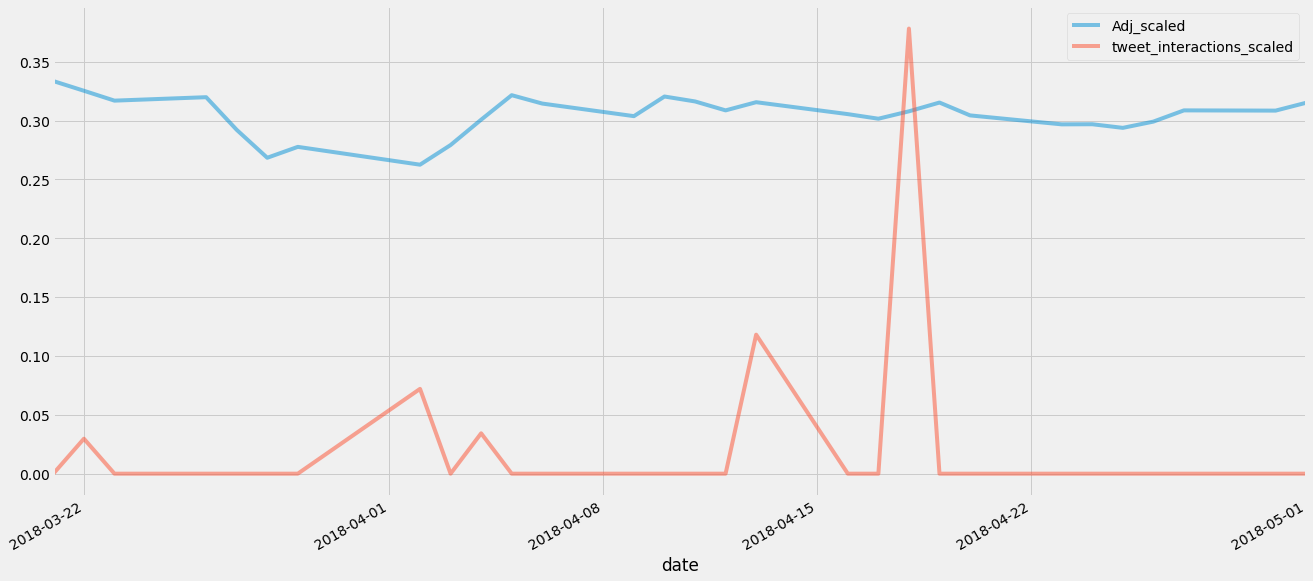

In [197]:
#Focus on April 2018 during April fool Joke - Model 3 & 
df_TSLA_related_tweets[['Adj_scaled', 'tweet_interactions_scaled']]['2018-03-21':'2018-05-01'].plot(alpha=0.5, figsize=(20,10))

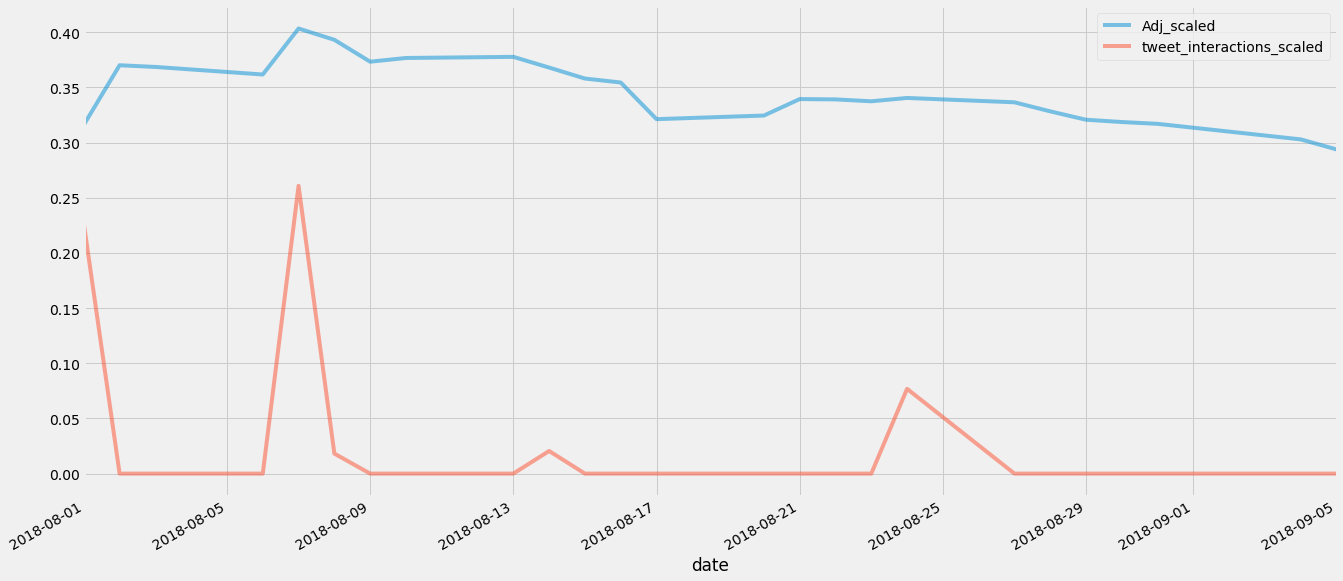

In [198]:
#Focus on August 2018 during the SEC Tweet Storm
df_TSLA_related_tweets[['Adj_scaled', 'tweet_interactions_scaled']]['2018-08-01':'2018-09-05'].plot(alpha=0.5, figsize=(20,10))

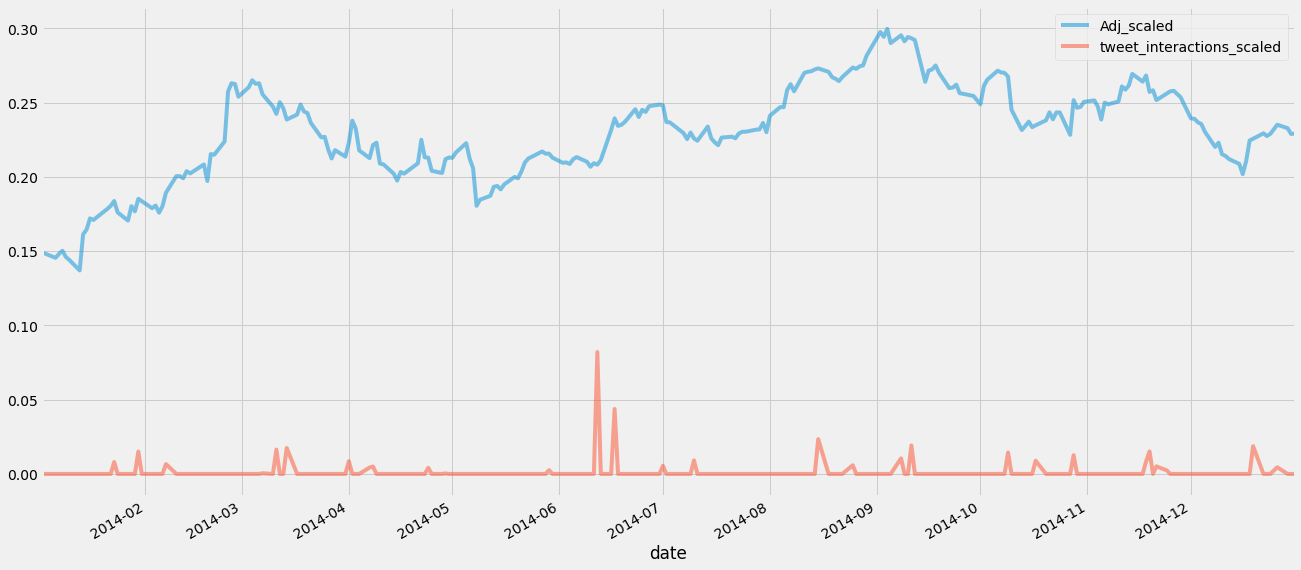

In [199]:
#new Focusing on period with LOC
df_TSLA_related_tweets[['Adj_scaled', 'tweet_interactions_scaled']]['2014-01-01':'2015-01-01'].plot(alpha=0.5, figsize=(20,10))

According to the top 50 tweets in terms of interactions, several tweets issued during the week of November 23rd generated coincide with important spikes in the stock

- 3 tweets from November, 21st to 24th 2019, covering the annoucement of the new CyberTruck
- cf. 22/11/2018
-  21/11/2013 https://twitter.com/elonmusk/status/403602986561073152
- 12/08/2013 2 tweets on HyperLoop - 11.7K interactions https://twitter.com/elonmusk/status/367025547852800000

331	2018-04-01	4	46144	7594	53738

619	2020-01-07	1	37175	7420	44595
629	2020-01-29	1	37648	4488	42136

372	2018-06-26	6	9765	30801	40566
415	2018-10-12	2	32960	5263	38223
337	2018-04-18	1	33313	2095	35408
440	2018-11-29	3	29813	5495	35308

476	2019-02-20	2	27502	7500	35002
319	2017-11-12	2	28089	3720	31809
343	2018-05-14	3	25923	4605	30528
347	2018-05-22	6	11937	18239	30176
325	2017-12-26	3	14324	15684	30008
290	2017-06-01	1	24806	1815	26621
508	2019-04-24	4	20400	4562	24962
320	2017-11-17	1	22722	2059	24781

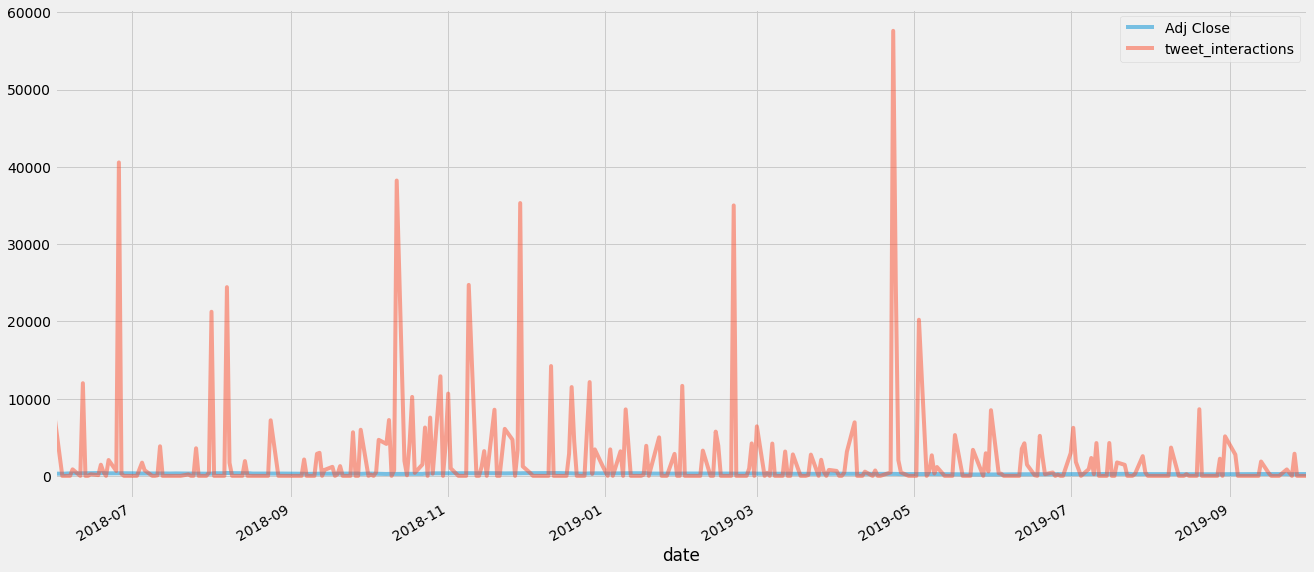

In [200]:
#new Focusing on period with LOC
df_TSLA_related_tweets[['Adj Close', 'tweet_interactions']]['2018-06-01':'2019-10-01'].plot(alpha=0.5, figsize=(20,10))

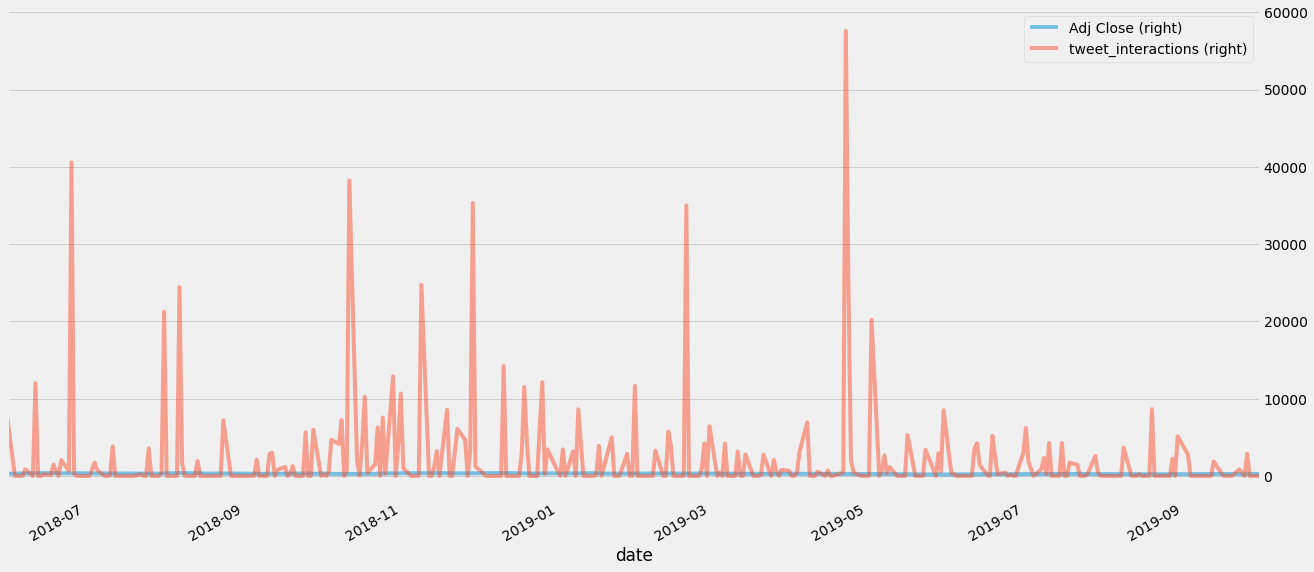

In [201]:
#new Focusing on period with LOC
df_TSLA_related_tweets[['Adj Close', 'tweet_interactions']]['2018-06-01':'2019-10-01'].plot(alpha=0.5, secondary_y=True,figsize=(20,10))

In [202]:
df_TSLA_related_tweets

,Adj Close,text,tweet_interactions,Adj_scaled,tweet_amount_scaled,tweet_interactions_scaled
date,,,,,,
2010-06-29,23.889999,0.0,0.0,0.008973,0.000000,0.000000
2010-06-30,23.830000,0.0,0.0,0.008906,0.000000,0.000000
2010-07-01,21.959999,0.0,0.0,0.006832,0.000000,0.000000
2010-07-02,19.200001,0.0,0.0,0.003771,0.000000,0.000000
2010-07-06,16.110001,0.0,0.0,0.000344,0.000000,0.000000
2010-07-07,15.800000,0.0,0.0,0.000000,0.000000,0.000000
2010-07-08,17.459999,0.0,0.0,0.001841,0.000000,0.000000
2010-07-09,17.400000,0.0,0.0,0.001775,0.000000,0.000000
2010-07-12,17.049999,0.0,0.0,0.001386,0.000000,0.000000


In [203]:
df_TSLA_related_tweets2 = df_TSLA_related_tweets.reset_index()

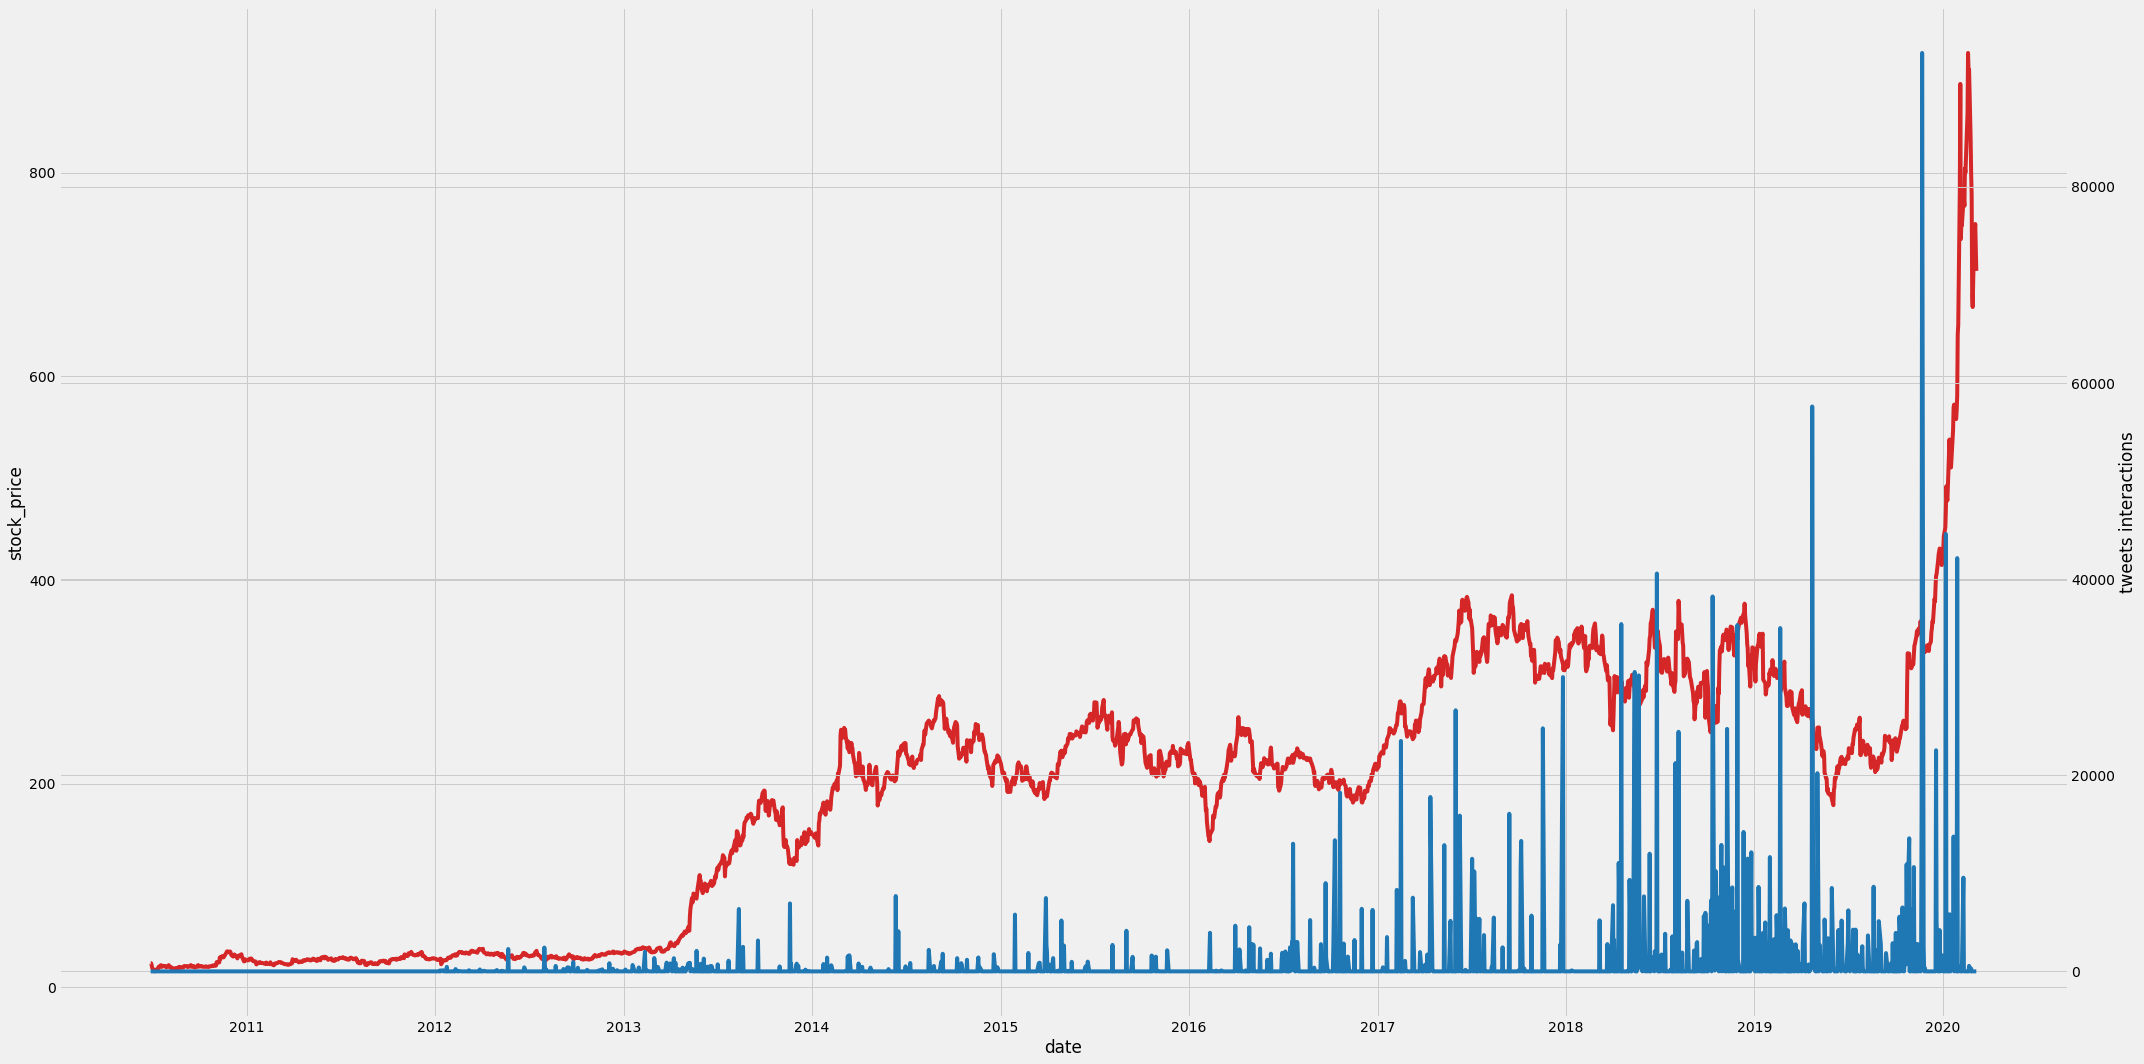

In [204]:
fig, ax1 = plt.subplots(figsize=(30,15))

color='black'
color1 = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('stock_price', color=color)
ax1.plot(df_TSLA_related_tweets['Adj Close'], color=color1)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('tweets interactions', color=color)  # we already handled the x-label with ax1
ax2.plot(df_TSLA_related_tweets['tweet_interactions'], color=color2)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### XXXX - 2 Listing a list of influential Tweets

In [205]:
top_100_TSLA_tweets_interactions = pd.read_csv('../DataSets/Twitter_data/top_100_TSLA_tweets_interactions.csv')

## Several product launch

The CyberTruck launch in November 2019 generated 4 tweets among the Top 10 in terms Interaction ;
Both the grand exposure Twitter gave, and the important impact of the launch of that original product, generated important visibility to the brand.

In [206]:
for i in top_100_TSLA_tweets_interactions['permalink'][0:20]:
    url = create_Twitter_link(i)
    Tweet(url)
Tweet(url)

## Controversies

The CyberTruck launch in November 2019 generated 4 tweets among the Top 10 in terms Interaction ;
Both the grand exposure Twitter gave, and the important impact of the launch of that original product, generated important visibility to the brand.

In [207]:
bankrupcy = top_100_TSLA_tweets_interactions.loc[top_100_TSLA_tweets_interactions['text'].str.contains('Bankrupt')]

for i in bankrupcy['permalink']:
    url = create_Twitter_link(i)
Tweet(url)

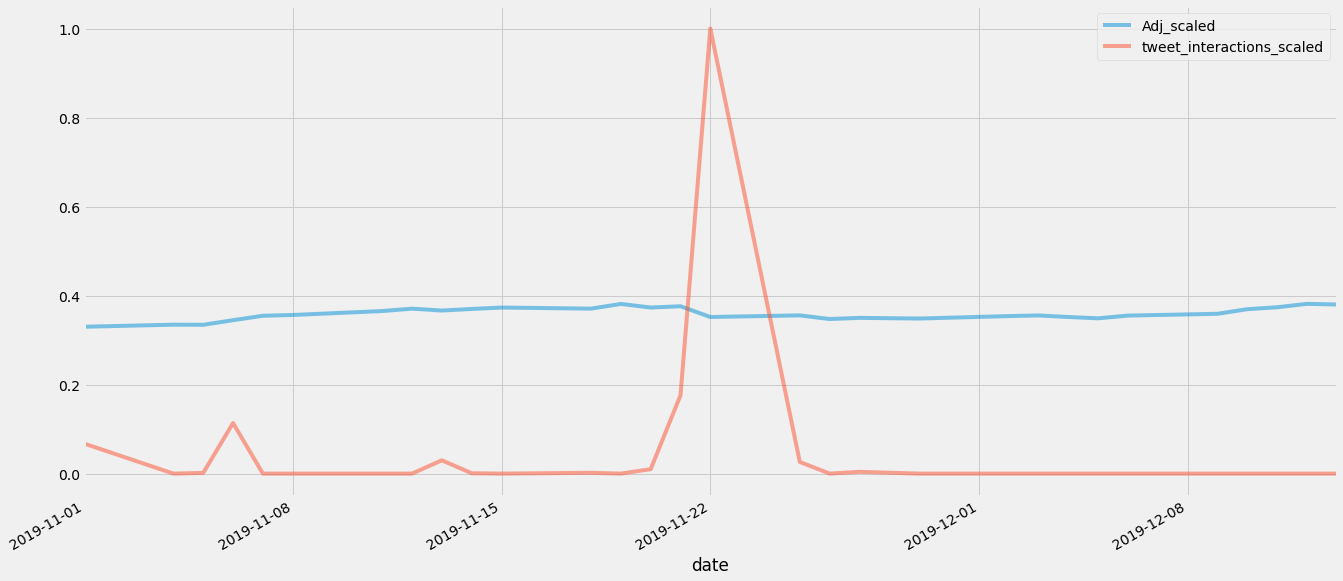

In [208]:
#Focus on August 2018 during the SEC Tweet Storm
df_TSLA_related_tweets[['Adj_scaled', 'tweet_interactions_scaled']]['2019-11-01':'2019-12-15'].plot(alpha=0.5, figsize=(20,10))

In [209]:
bankrupcy['permalink']

25    https://twitter.com/elonmusk/status/980566101124722688
Name: permalink, dtype: object

- 7/8/2018
- 6/2/2018
- 20/2/2019
- Apr 1, 2018

- 2018 Oct 4
https://twitter.com/elonmusk/status/1047943670350020608?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1047943670350020608&ref_url=https%3A%2F%2Fmashable.com%2Farticle%2Felon-musk-end-of-year-2018-tesla-twitter%2F
Just want to that the Shortseller Enrichment Commission is doing incredible work. And the name change is so on point!

- 2018 July 9
https://twitter.com/elonmusk/status/1016443130017505280?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1016443130017505280&ref_url=https%3A%2F%2Fmashable.com%2Farticle%2Felon-musk-end-of-year-2018-tesla-twitter%2F
Just returned from Cave 3. Mini-sub is ready if needed. It is made of rocket parts & named Wild Boar after kids’ soccer team. Leaving here in case it may be useful in the future. Thailand is so beautiful.

- 2018 May 24
https://twitter.com/elonmusk/status/999513492825620481
But consider it real. We could unveil Model Y anytime from late this year to mid next year, so March 15 is about right.

- 2018 April 1
- 2018 Sept 7


STARMAN
- 2 déc. 2017
- 5/2/2018
- 6/2/2018
- 7/2/2018
- 11/3/2018

In [210]:
for i in top_100_TSLA_tweets_interactions['permalink'][20:40]:
    print(i)

https://twitter.com/elonmusk/status/1203463366968135680
https://twitter.com/elonmusk/status/945712432416137217
https://twitter.com/elonmusk/status/1013519243030253570
https://twitter.com/elonmusk/status/998786412970369024
https://twitter.com/elonmusk/status/1061123924354875393
https://twitter.com/elonmusk/status/980566101124722688
https://twitter.com/elonmusk/status/1098013283372589056
https://twitter.com/elonmusk/status/1208831048026509312
https://twitter.com/elonmusk/status/929823757635481600
https://twitter.com/elonmusk/status/1057010155332628481
https://twitter.com/elonmusk/status/931412020016029696
https://twitter.com/elonmusk/status/1197627433970589696
https://twitter.com/elonmusk/status/996131586469842945
https://twitter.com/elonmusk/status/980566116614291456
https://twitter.com/elonmusk/status/1155179932474957825
https://twitter.com/elonmusk/status/1198700591465156608
https://twitter.com/elonmusk/status/1145115024114896896
https://twitter.com/elonmusk/status/1224087317364854785